In [1]:
import pandas as pd 
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
cars_data = pd.read_csv("C:/Users/Ranesh/OneDrive/Desktop/Machine Leraning Projects/Car_Price_Est_Ml_Model/Cardetails.csv")

In [3]:
cars_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
cars_data.drop(columns=['torque'], inplace=True)

In [5]:
cars_data.duplicated().sum()

1202

In [6]:
cars_data.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
seats            221
dtype: int64

In [7]:
cars_data = cars_data.fillna(method ='bfill')

In [8]:
cars_data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

In [9]:
for col in cars_data.columns:
    print('Unique values of ' + col)
    print(cars_data[col].unique())
    print("======================")

Unique values of name
['Maruti Swift Dzire VDI' 'Skoda Rapid 1.5 TDI Ambition'
 'Honda City 2017-2020 EXi' ... 'Tata Nexon 1.5 Revotorq XT'
 'Ford Freestyle Titanium Plus Diesel BSIV'
 'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV']
Unique values of year
[2014 2006 2010 2007 2017 2001 2011 2013 2005 2009 2016 2012 2002 2015
 2018 2003 2019 2008 2020 1999 2000 1983 2004 1996 1994 1995 1998 1997
 1991]
Unique values of selling_price
[  450000   370000   158000   225000   130000   440000    96000    45000
   350000   200000   500000    92000   280000   180000   400000   778000
   150000   680000   174000   950000   525000   600000   575000   275000
   300000   220000   254999   670000    70000   730000   650000   330000
   366000  1149000   425000  2100000   925000   675000   819999   390000
  1500000   700000  1450000  1090000   850000  1650000  1750000  1590000
  1689999  1425000   265000   190000   630000   540000   448000   745000
  1025000   235000  1700000    50000  1200000   610000

In [10]:
def get_brand_name(car_name):
    car_name = car_name.split(' ')[0]
    return car_name.strip()

In [11]:
def clean_data(value):
    value = value.split(' ')[0]
    value = value.strip()
    if value == '':
        value = 0
    return float(value)

In [12]:
get_brand_name('Maruti  Swift Dzire VDI')

'Maruti'

In [13]:
cars_data['company'] = cars_data['name'].apply(get_brand_name)

In [14]:
cars_data['company'].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'Peugeot'],
      dtype=object)

In [15]:
cars_data['mileage'] = cars_data['mileage'].apply(clean_data)

In [16]:
cars_data['max_power'] = cars_data['max_power'].apply(clean_data)

In [17]:
cars_data['engine'] = cars_data['engine'].apply(clean_data)

In [18]:
for col in cars_data.columns:
    print('Unique values of ' + col)
    print(cars_data[col].unique())
    print("======================")

Unique values of name
['Maruti Swift Dzire VDI' 'Skoda Rapid 1.5 TDI Ambition'
 'Honda City 2017-2020 EXi' ... 'Tata Nexon 1.5 Revotorq XT'
 'Ford Freestyle Titanium Plus Diesel BSIV'
 'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV']
Unique values of year
[2014 2006 2010 2007 2017 2001 2011 2013 2005 2009 2016 2012 2002 2015
 2018 2003 2019 2008 2020 1999 2000 1983 2004 1996 1994 1995 1998 1997
 1991]
Unique values of selling_price
[  450000   370000   158000   225000   130000   440000    96000    45000
   350000   200000   500000    92000   280000   180000   400000   778000
   150000   680000   174000   950000   525000   600000   575000   275000
   300000   220000   254999   670000    70000   730000   650000   330000
   366000  1149000   425000  2100000   925000   675000   819999   390000
  1500000   700000  1450000  1090000   850000  1650000  1750000  1590000
  1689999  1425000   265000   190000   630000   540000   448000   745000
  1025000   235000  1700000    50000  1200000   610000

In [19]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        8128 non-null   float64
 9   engine         8128 non-null   float64
 10  max_power      8128 non-null   float64
 11  seats          8128 non-null   float64
 12  company        8128 non-null   object 
dtypes: float64(4), int64(3), object(6)
memory usage: 825.6+ KB


In [20]:
cars_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,company
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,Maruti
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,Skoda
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,Honda
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,Hyundai
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,Maruti


In [21]:
cleaned_cars_df = pd.read_table("C:/Users/Ranesh/OneDrive/Desktop/Machine Leraning Projects/Car-Price-Prediction-Machine-Learing-Projects-main/Car-Price-Prediction-Machine-Learing-Projects-main/Cleaned_car_df",sep =',')
cleaned_cars_df.head()

,Unnamed: 0,name,company,year,Price,kms_driven,fuel_type
0,0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
2,3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol
3,4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel
4,6,Ford Figo,Ford,2012,175000,41000,Diesel


In [22]:
cleaned_cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  816 non-null    int64 
 1   name        816 non-null    object
 2   company     816 non-null    object
 3   year        816 non-null    int64 
 4   Price       816 non-null    int64 
 5   kms_driven  816 non-null    int64 
 6   fuel_type   816 non-null    object
dtypes: int64(4), object(3)
memory usage: 44.8+ KB


In [23]:
cleaned_cars_df.drop(columns=['Unnamed: 0'], inplace=True)

In [24]:
cleaned_cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int64 
 3   Price       816 non-null    int64 
 4   kms_driven  816 non-null    int64 
 5   fuel_type   816 non-null    object
dtypes: int64(3), object(3)
memory usage: 38.4+ KB


In [25]:
concat_car = pd.concat([cars_data, cleaned_cars_df], axis=1)

In [26]:
concat_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        8128 non-null   float64
 9   engine         8128 non-null   float64
 10  max_power      8128 non-null   float64
 11  seats          8128 non-null   float64
 12  company        8128 non-null   object 
 13  name           816 non-null    object 
 14  company        816 non-null    object 
 15  year           816 non-null    float64
 16  Price          816 non-null    float64
 17  kms_driven     816 non-null    float64
 18  fuel_typ

In [27]:
concat_car.to_csv('combined_car_data.csv')

In [28]:
combined_car_df=pd.read_csv('C:/Users/Ranesh/Domain Specific Data Science Projects/combined_car_dataset.csv')

In [29]:
combined_car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8973 entries, 0 to 8972
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          8128 non-null   float64
 1   name           8944 non-null   object 
 2   year           8944 non-null   float64
 3   selling_price  8944 non-null   float64
 4   km_driven      8944 non-null   float64
 5   fuel           8944 non-null   object 
 6   seller_type    8128 non-null   object 
 7   transmission   8128 non-null   object 
 8   owner          8128 non-null   object 
 9   mileage        8128 non-null   float64
 10  engine         8128 non-null   float64
 11  max_power      8128 non-null   float64
 12  seats          8128 non-null   float64
 13  company        8944 non-null   object 
dtypes: float64(8), object(6)
memory usage: 981.6+ KB


In [30]:
combined_car_df.drop(columns=['Index'], inplace=True)

In [31]:
combined_car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8973 entries, 0 to 8972
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8944 non-null   object 
 1   year           8944 non-null   float64
 2   selling_price  8944 non-null   float64
 3   km_driven      8944 non-null   float64
 4   fuel           8944 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        8128 non-null   float64
 9   engine         8128 non-null   float64
 10  max_power      8128 non-null   float64
 11  seats          8128 non-null   float64
 12  company        8944 non-null   object 
dtypes: float64(7), object(6)
memory usage: 911.4+ KB


In [32]:
order = ['name','company','year','km_driven','fuel','seller_type','transmission','owner','mileage','engine','max_power','seats','selling_price']
combined_car_df = combined_car_df[order]

In [33]:
combined_car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8973 entries, 0 to 8972
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8944 non-null   object 
 1   company        8944 non-null   object 
 2   year           8944 non-null   float64
 3   km_driven      8944 non-null   float64
 4   fuel           8944 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        8128 non-null   float64
 9   engine         8128 non-null   float64
 10  max_power      8128 non-null   float64
 11  seats          8128 non-null   float64
 12  selling_price  8944 non-null   float64
dtypes: float64(7), object(6)
memory usage: 911.4+ KB


In [34]:
combined_car_df = combined_car_df.fillna(combined_car_df.mode().iloc[0])

In [35]:
combined_car_df.isnull().sum()

name             0
company          0
year             0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
selling_price    0
dtype: int64

In [36]:
combined_car_df['year'] = combined_car_df['year'].astype(int)

In [37]:
for col in combined_car_df.columns:
    print('Unique values of ' + col)
    print(combined_car_df[col].unique())
    print("======================")

Unique values of name
['Maruti Swift Dzire VDI' 'Skoda Rapid 1.5 TDI Ambition'
 'Honda City 2017-2020 EXi' ... 'Maruti Suzuki Ritz VXI ABS'
 'Tata Indica V2 DLE BS III' 'Tata Zest XM Diesel']
Unique values of company
['Maruti' 'Skoda' 'Honda' 'Hyundai' 'Toyota' 'Ford' 'Renault' 'Mahindra'
 'Tata' 'Chevrolet' 'Fiat' 'Datsun' 'Jeep' 'Mercedes-Benz' 'Mitsubishi'
 'Audi' 'Volkswagen' 'BMW' 'Nissan' 'Lexus' 'Jaguar' 'Land' 'MG' 'Volvo'
 'Daewoo' 'Kia' 'Force' 'Ambassador' 'Ashok' 'Isuzu' 'Opel' 'Peugeot'
 'Mini' 'Hindustan' 'Mercedes']
Unique values of year
[2014 2006 2010 2007 2017 2001 2011 2013 2005 2009 2016 2012 2002 2015
 2018 2003 2019 2008 2020 1999 2000 1983 2004 1996 1994 1995 1998 1997
 1991]
Unique values of km_driven
[145500. 120000. 140000. ... 100800.   2100.   2500.]
Unique values of fuel
['Diesel' 'Petrol' 'LPG' 'CNG']
Unique values of seller_type
['Individual' 'Dealer' 'Trustmark Dealer']
Unique values of transmission
['Manual' 'Automatic']
Unique values of owner
['First O

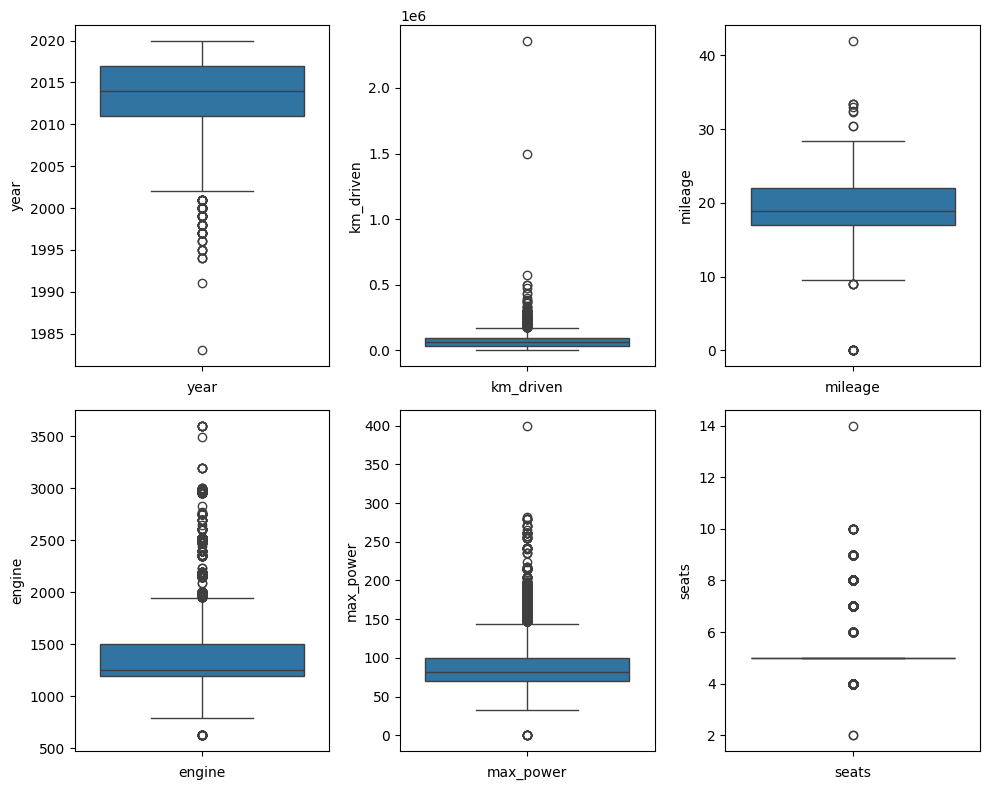

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,3, figsize = (10,8))
plt1 = sns.boxplot(combined_car_df['year'], ax = axs[0,0]).set(xlabel= 'year')
plt2 = sns.boxplot(combined_car_df['km_driven'], ax = axs[0,1]).set(xlabel='km_driven')
plt3 = sns.boxplot(combined_car_df['mileage'], ax = axs[0,2]).set(xlabel='mileage')
plt1 = sns.boxplot(combined_car_df['engine'], ax = axs[1,0]).set(xlabel='engine')
plt2 = sns.boxplot(combined_car_df['max_power'], ax = axs[1,1]).set(xlabel='max_power')
plt3 = sns.boxplot(combined_car_df['seats'], ax = axs[1,2]).set(xlabel='seats')

plt.tight_layout()

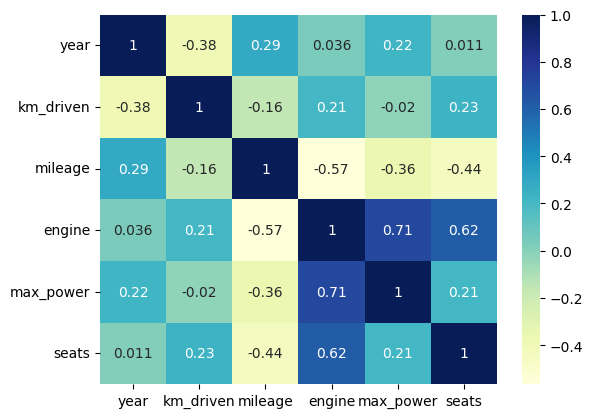

In [39]:
dataplot = sns.heatmap(combined_car_df[['year','km_driven','mileage','engine','max_power','seats']].corr(),cmap='YlGnBu',annot=True)
plt.show()

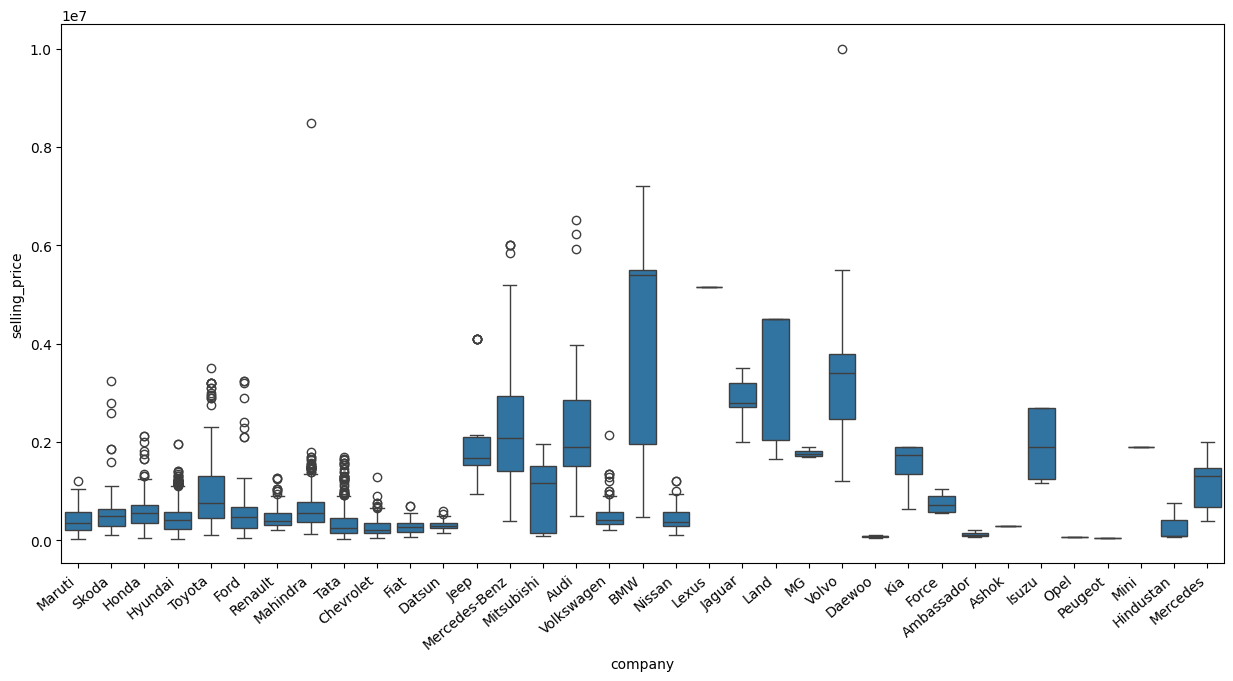

In [40]:
plt.subplots(figsize=(15,7))
ax = sns.boxplot(x='company',y='selling_price',data=combined_car_df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

In [41]:
combined_car_df.to_csv('car_data.csv')

In [42]:
combined_car_df.head()

,name,company,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,selling_price
0,Maruti Swift Dzire VDI,Maruti,2014,145500.0,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,450000.0
1,Skoda Rapid 1.5 TDI Ambition,Skoda,2014,120000.0,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,370000.0
2,Honda City 2017-2020 EXi,Honda,2006,140000.0,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,158000.0
3,Hyundai i20 Sportz Diesel,Hyundai,2010,127000.0,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,225000.0
4,Maruti Swift VXI BSIII,Maruti,2007,120000.0,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,130000.0


In [43]:
combined_car_df.columns

Index(['name', 'company', 'year', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats',
       'selling_price'],
      dtype='object')

In [44]:
X = combined_car_df[['name', 'company', 'year', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats',]]
y = combined_car_df['selling_price']

In [45]:
X.shape,y.shape

((8973, 12), (8973,))

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [47]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
ohe = OneHotEncoder(handle_unknown='ignore',drop='first')
scale = StandardScaler()

preprocesser = ColumnTransformer(
        transformers = [
            ('StandardScale', scale, [2,3,8,9,10,11]),
            ('OHE', ohe, [0,1,4,5,6,7]),
        ],
        remainder='passthrough'
)

In [48]:
preprocesser

ColumnTransformer(remainder='passthrough',
                  transformers=[('StandardScale', StandardScaler(),
                                 [2, 3, 8, 9, 10, 11]),
                                ('OHE',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 [0, 1, 4, 5, 6, 7])])

In [49]:
X_train_dummy = preprocesser.fit_transform(X_train)
X_test_dummy = preprocesser.transform(X_test)

In [50]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

In [51]:
models = {
    'Linear Regression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'KNeighbor':KNeighborsRegressor(),
    'Decision Tree Regressor':DecisionTreeRegressor(),
    'Random Forest Regressor':RandomForestRegressor(),
    'XGB Regressor': XGBRegressor()
}
for name, md in models.items():
    md.fit(X_train_dummy,y_train)
    y_pred = md.predict(X_test_dummy)
    print(f"{name} : R2 score : {r2_score(y_test,y_pred)*100}")

Linear Regression : R2 score : 92.84403509206327
Lasso : R2 score : 93.12457466597543
Ridge : R2 score : 94.0510068479513
KNeighbor : R2 score : 94.49088479359041
Decision Tree Regressor : R2 score : 95.1877073326588
Random Forest Regressor : R2 score : 96.84241671212172
XGB Regressor : R2 score : 97.24526847591453


In [52]:
xgb = XGBRegressor()
xgb.fit(X_train_dummy,y_train)
xgb.predict(X_test_dummy)

array([177675.39, 358153.78, 355075.66, ..., 646614.94, 225220.33,
       249222.28], dtype=float32)

In [53]:
def prediction(name, company, year, km_driven, fuel, seller_type,transmission, owner, mileage, engine, max_power, seats):
    # Create an array of the input features
    features = np.array([[name, company, year, km_driven, fuel, seller_type,transmission, owner, mileage, engine, max_power, seats]], dtype=object)

    # Transform the features using the preprocessor
    transformed_features = preprocesser.transform(features)

    # Make the prediction
    predicted_yield = xgb.predict(transformed_features).reshape(1, -1)

    return predicted_yield[0]

In [54]:
name = 'Maruti Swift Dzire VDI'
company = 'Maruti'
year = 2014
km_driven = 145500.0
fuel = 'Diesel'
seller_type = 'Individual'
transmission = 'Manual'
owner = 'First Owner'	
mileage = 23.40 
engine = 1248
max_power = 74.00
seats = 5

result = prediction(name, company, year, km_driven, fuel, seller_type,transmission, owner, mileage, engine, max_power, seats)

In [55]:
# Hyundai i20 Sportz Diesel	Hyundai	2010.0	127000.0	Diesel	Individual	Manual	First Owner	23.00	1396.0	90.00	5.0	225000.0

In [56]:
result

array([457897.6], dtype=float32)

In [57]:
# Maruti Swift Dzire VDI	Maruti	2014.0	145500.0	Diesel	Individual	Manual	First Owner	23.40	1248.0	74.00	5.0	450000.0

In [58]:
import pickle
pickle.dump(xgb,open('xgb.pkl','wb'))
pickle.dump(preprocesser,open('preprocessor.pkl','wb'))